### **Анализ убытков приложения ProcrastinatePRO+**

### **Описание проекта:**
Procrastinate Pro+ - развлекательное приложение. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Задача исследования - разобраться в причинах и помочь компании выйти в плюс. Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:

*   лог сервера с данными об их посещениях;
*   выгрузка их покупок за этот период;
*   рекламные расходы.

<br>Мне предстоит изучить:

*   откуда приходят пользователи и какими устройствами они пользуются;
*   сколько стоит привлечение пользователей из различных рекламных каналов;
*   сколько денег приносит каждый клиент;
*   когда расходы на привлечение клиента окупаются;
*   какие факторы мешают привлечению клиентов;





### **Описание данных:**
В моем распоряжении три датасета.
<br>Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, orders_info_short.csv — информацию о заказах, а costs_info_short.csv — информацию о расходах на рекламу.

<br>Структура visits_info_short.csv:
*   `User Id` — уникальный идентификатор пользователя;
*   `Region` — страна пользователя;
*   `Device` — тип устройства пользователя;
*   `Channel` — идентификатор источника перехода;
*   `Session Start` — дата и время начала сессии;
*   `Session End` — дата и время окончания сессии.
<br>Структура orders_info_short.csv:
*   `User Id` — уникальный идентификатор пользователя,
*   `Event Dt` — дата и время покупки,
*   `Revenue` — сумма заказа.

<br>Структура costs_info_short.csv:

*   `dt` — дата проведения рекламной кампании,
*   `Channel` — идентификатор рекламного источника,
*   `costs` — расходы на эту кампанию.




### Предобработка данных.

Импортирую библиотеки для работы.

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
from datetime import datetime, timedelta

In [ ]:
from matplotlib import pyplot as plt

Загружаю данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/procrastinatepro+

Mounted at /content/drive/
/content/drive/My Drive/procrastinatepro+


In [ ]:
visits = pd.read_csv('visits_info_short.csv')

In [ ]:
costs = pd.read_csv('costs_info_short.csv')

In [ ]:
orders = pd.read_csv ('orders_info_short.csv')

Ознакомлюсь с данными. Для этого напишем функцию.

In [ ]:
def first_look (data):
    print('Первые 10 строк')
    display(data.head(10))
    print('Типы данных\n')
    display(data.info())
    print('Статистика.Сводка')
    display(data.describe())
    print('Пропуски:\n')
    display(data.isna().sum())
    print('\n Процент пропусков')
    display(data.isna().mean().sort_values(ascending=False)*100)
    print('\nДубликаты:\n')
    if data.duplicated().sum() > 0:
        print('Дубликатов: ', data.duplicated().sum())
    else:
        print('Дубликатов НЕТ')

In [ ]:
first_look(visits)

Первые 10 строк


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
5,90242400005,United States,iPhone,RocketSuperAds,2019-05-01 07:14:52,2019-05-01 08:19:56
6,43958116050,United States,Android,organic,2019-05-01 09:03:21,2019-05-01 10:08:39
7,185365244969,United States,iPhone,organic,2019-05-01 09:37:03,2019-05-01 10:00:43
8,446013509831,United States,iPhone,RocketSuperAds,2019-05-01 10:26:00,2019-05-01 10:59:17
9,100970711362,United States,Mac,TipTop,2019-05-01 04:39:53,2019-05-01 04:57:05


Типы данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

Статистика.Сводка


,User Id
count,3.099010e+05
mean,4.997664e+11
std,2.887899e+11
min,5.993260e+05
25%,2.493691e+11
50%,4.989906e+11
75%,7.495211e+11
max,9.999996e+11


Пропуски:



User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64


 Процент пропусков


User Id          0.0
Region           0.0
Device           0.0
Channel          0.0
Session Start    0.0
Session End      0.0
dtype: float64


Дубликаты:

Дубликатов НЕТ


In [ ]:
first_look(costs)

Первые 10 строк


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
5,2019-05-06,FaceBoom,118.8
6,2019-05-07,FaceBoom,101.2
7,2019-05-08,FaceBoom,100.1
8,2019-05-09,FaceBoom,93.5
9,2019-05-10,FaceBoom,104.5


Типы данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

Статистика.Сводка


,costs
count,1800.000000
mean,58.609611
std,107.740223
min,0.800000
25%,6.495000
50%,12.285000
75%,33.600000
max,630.000000


Пропуски:



dt         0
Channel    0
costs      0
dtype: int64


 Процент пропусков


dt         0.0
Channel    0.0
costs      0.0
dtype: float64


Дубликаты:

Дубликатов НЕТ


In [ ]:
first_look(orders)

Первые 10 строк


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
5,129100331057,2019-05-01 01:56:28,4.99
6,626807144131,2019-05-01 02:39:21,4.99
7,914062168985,2019-05-01 02:02:18,4.99
8,769669137453,2019-05-01 03:39:47,4.99
9,434198630691,2019-05-01 18:16:50,5.99


Типы данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

Статистика.Сводка


,User Id,Revenue
count,4.021200e+04,40212.000000
mean,4.990295e+11,5.370608
std,2.860937e+11,3.454208
min,5.993260e+05,4.990000
25%,2.511324e+11,4.990000
50%,4.982840e+11,4.990000
75%,7.433327e+11,4.990000
max,9.998954e+11,49.990000


Пропуски:



User Id     0
Event Dt    0
Revenue     0
dtype: int64


 Процент пропусков


User Id     0.0
Event Dt    0.0
Revenue     0.0
dtype: float64


Дубликаты:

Дубликатов НЕТ


Обнаруженные следующие проблемы в ходе предобратбоки данных:
*   следует изменить названия столбцов на `snake_case`;
*   типы данных в `Session Start` и `Session End` необходимо перевести в `datetime`

In [ ]:
visits.columns

Index(['User Id', 'Region', 'Device', 'Channel', 'Session Start',
       'Session End'],
      dtype='object')

In [ ]:
visits = visits.rename(columns={'User Id':'user_id',
                        'Region':'region',
                        'Device':'device',
                        'Channel':'channel',
                        'Session Start':'session_start',
                        'Session End':'session_end'})

In [ ]:
orders.columns

Index(['User Id', 'Event Dt', 'Revenue'], dtype='object')

In [ ]:
orders = orders.rename(columns={'User Id':'user_id',
                        'Event Dt':'event_dt',
                        'Revenue':'revenue'})

In [ ]:
costs.columns

Index(['dt', 'Channel', 'costs'], dtype='object')

In [ ]:
costs = costs.rename(columns={'dt':'dt',
                        'Channel':'channel',
                        'costs':'costs'})

In [ ]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

Проверим изменения

In [ ]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [ ]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


#### Промежуточный итог:
Серьезных проблем в данных нет. Были исправлены названия колонок и колонки, содержащие время или дату приведены к правильному типу. Аномалий, дубликатов и пропусков в датафреймах нет.



### Исследовательский анализ данных.


*   Составлю профили пользователей. Определю минимальную и максимальную даты привлечения пользователей;
*   Выясню, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей;
*   Построю таблицу, отражающую количество пользователей и долю платящих из каждой страны;
*   Узнаю, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построю таблицу, отражающую количество пользователей и долю платящих для каждого устройства;
*   Изучу рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Построю таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.
<br> Для исследования воспользуемся функциями для расчёта и анализа LTV, ROI, удержания и конверсии, которые у нас есть.



In [ ]:
def get_profiles(sessions, orders, costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [ ]:
profiles = get_profiles(visits,orders,costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-07 20:58:57,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-09 12:46:07,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01 09:58:33,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-22 21:35:48,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-02 00:07:44,False,0.230769


In [ ]:
display('Минимальная дата привлечения', profiles.first_ts.min())
display('Максимальная дата привлечения', profiles.first_ts.max())

'Минимальная дата привлечения'

Timestamp('2019-05-01 00:00:41')

'Максимальная дата привлечения'

Timestamp('2019-10-27 23:59:04')

Минимальная и максимальная дата привлечения клиента совпадает с техническим заданием. 150 008 профилей, в каждом из которых есть данные о дате первого посещения. Имея готовые профили пользователей, легко узнать из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [ ]:
country = profiles.groupby('region').agg({'payer': 'mean', 'user_id': 'count'})
country['payer'] *= 100
country = country.sort_values(by='payer', ascending=False)
country

,payer,user_id
region,,
United States,6.901862,100002
Germany,4.111875,14981
UK,3.982930,17575
France,3.799427,17450


Больше всего пользователей из США, самая высокая доля платящих также в США.

In [ ]:
gadjet = profiles.groupby('device').agg({'payer': 'mean', 'user_id': 'count'})
gadjet['payer'] *= 100
gadjet = gadjet.sort_values(by='payer', ascending=False)
gadjet

,payer,user_id
device,,
Mac,6.364423,30042
iPhone,6.207897,54479
Android,5.851793,35032
PC,5.046790,30455


Доля плательщиков с компьютеров Мак и с айфона примерно одинаковая, однако стоит заметить, что количество пользователей, которые пользуются айфоном больше почти в 2 раза.

In [ ]:
ads_channels = profiles.groupby(
    'channel').agg(
    {'user_id' : 'nunique',
    'payer' : 'mean'})
ads_channels['payer'] = ads_channels['payer']*100
ads_channels.sort_values(by='payer', ascending=False)

,user_id,payer
channel,,
FaceBoom,29144,12.204914
AdNonSense,3880,11.340206
lambdaMediaAds,2149,10.469986
TipTop,19561,9.600736
RocketSuperAds,4448,7.913669
WahooNetBanner,8553,5.296387
YRabbit,4312,3.826531
MediaTornado,4364,3.574702
LeapBob,8553,3.063253


Высокая доля платящих которые пришли с канала привлечения FaceBoom. Мало клиентов привлек рекламный канал AdNonSense, но с канала высокая доля платящих клиентов 11,3%. Больше всего клиентов пришли самостоятельно (56439 пользователей), доля платящих в этой группе клиентов лишь 2%

#### Промежуточный итог:
Больше всего привлеченных клиентов, в том числе доля платящих, из США. Более половины привлеченных пользователей использую устройства Apple. Самым удачным каналом привлечения клиентов это: AdNonSense и lambdaMediaAds.



#### Маркетинг

*   Посчитаю общую сумму расходов на маркетинг;
*   Выясню, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник;
*   Построю визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику;
*   Узнаю, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.




In [ ]:
costs['costs'].sum().round(2)

105497.3

Общая сумма расходов на все рекламные кампании  - 105497,3

In [ ]:
channel_costs = (
    profiles
    .groupby('channel')
    .agg({'acquisition_cost':'sum'})
    .rename(columns={'acquisition_cost':'sum_cost'})
    .sort_values(by='sum_cost', ascending=False)
    .reset_index()
)


channel_costs['ratio_cost'] = channel_costs['sum_cost'] / costs['costs'].sum() * 100
channel_costs = channel_costs.sort_values(by='ratio_cost', ascending=False).style.format({'ratio_cost': '{:.2f}%', 'sum_cost': '{:.2f}'})

channel_costs

,channel,sum_cost,ratio_cost
0,TipTop,54751.30,51.90%
1,FaceBoom,32445.60,30.75%
2,WahooNetBanner,5151.00,4.88%
3,AdNonSense,3911.25,3.71%
4,OppleCreativeMedia,2151.25,2.04%
5,RocketSuperAds,1833.00,1.74%
6,LeapBob,1797.60,1.70%
7,lambdaMediaAds,1557.60,1.48%
8,MediaTornado,954.48,0.90%
9,YRabbit,944.22,0.90%


Больше всего средств потратили на TipTop и FaceBoom. При этом половина всего рекламного бюджета отправлено в TipTop.

Теперь построим графики динамики изменения расходов во времени(месяц, неделя, день) по каждому источнику.

In [ ]:
costs['week_number'] = pd.to_datetime(costs['dt']).dt.isocalendar().week
# добавим столбец с номером месяца
costs['month_number'] = pd.to_datetime(costs['dt']).dt.month

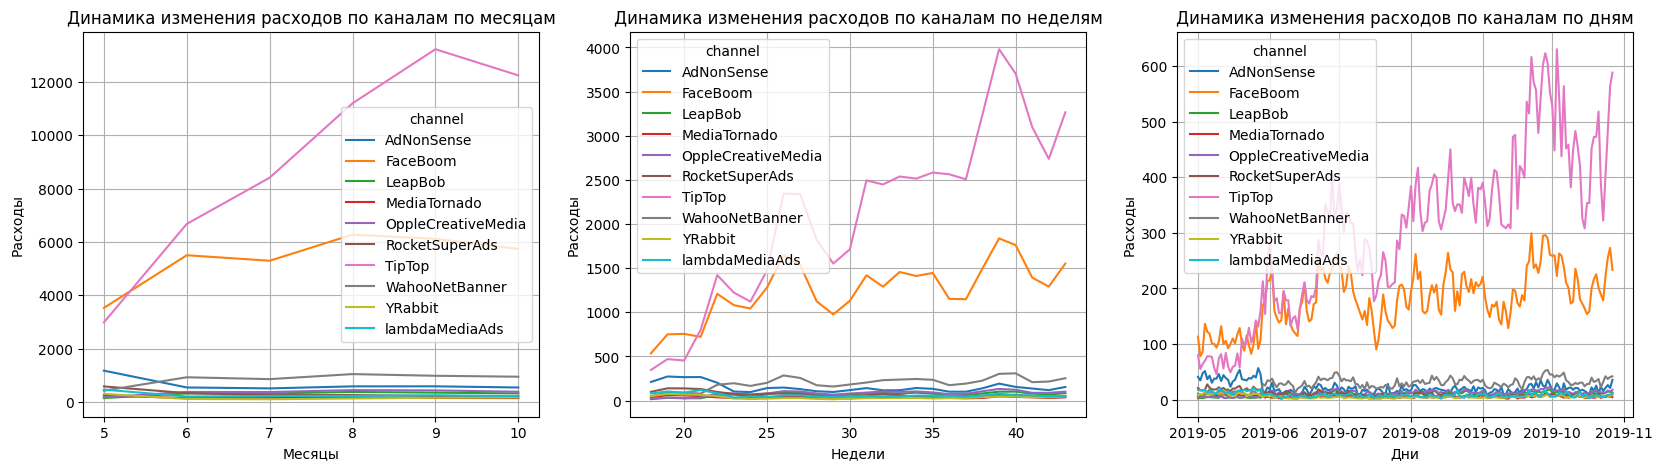

In [ ]:
pivot_table_monthly = costs.pivot_table(
    index='month_number',
    columns='channel',
    values='costs',
    aggfunc='sum'
)


pivot_table_weekly = costs.pivot_table(
    index='week_number',
    columns='channel',
    values='costs',
    aggfunc='sum'
)


pivot_table_daily = costs.pivot_table(
    index='dt',
    columns='channel',
    values='costs',
    aggfunc='sum'
)

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

pivot_table_monthly.plot(ax=axes[0], grid=True)
axes[0].set_title('Динамика изменения расходов по каналам по месяцам')
axes[0].set_xlabel('Месяцы')
axes[0].set_ylabel('Расходы')

pivot_table_weekly.plot(ax=axes[1], grid=True)
axes[1].set_title('Динамика изменения расходов по каналам по неделям')
axes[1].set_xlabel('Недели')
axes[1].set_ylabel('Расходы')

pivot_table_daily.plot(ax=axes[2], grid=True)
axes[2].set_title('Динамика изменения расходов по каналам по дням')
axes[2].set_xlabel('Дни')
axes[2].set_ylabel('Расходы')

plt.show()

На графиках видно, что больше всего денег на каналы TipTop и FaceBoom тратили в сентябре. Теперь посчитаю сколько в среднем стоило привлечение одного пользователя (САС) из каждого источника. Для начала сгруппирую и посчитаю сумму затрат с каждого источника.

Теперь можно посчитать САС.

In [ ]:
cac_channel = (
    profiles
    .groupby('channel')
    .agg({'acquisition_cost':'mean'})
    .rename(columns={'acquisition_cost':'avg_cac'})
    .sort_values(by='avg_cac', ascending=False)
    .reset_index()
)

cac_channel

,channel,avg_cac
0,TipTop,2.799003
1,FaceBoom,1.113286
2,AdNonSense,1.008054
3,lambdaMediaAds,0.724802
4,WahooNetBanner,0.602245
5,RocketSuperAds,0.412095
6,OppleCreativeMedia,0.250000
7,YRabbit,0.218975
8,MediaTornado,0.218717
9,LeapBob,0.210172


### Промежуточные итог:

Общая сумма затрат на маркетинг - 105497,3.
<br> Больше всего денег потратили на рекламные источники: TipTop и FaceBoom. Высокие расходы на эти источники были в сентябре.
<br> Высокая средняя стоимость на привлечение одного пользователя у источников TipTop и FaceBoom.

### Оценка окупаемости рекламы
Используя графики LTV, ROI и CAC, проанализирую окупаемость рекламы. Считаю, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения.
*   Проанализирую окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI;
*   Проверю конверсию пользователей и динамику её изменения. То же самое сделаю с удержанием пользователей. Построю и изучу графики конверсии и удержания;
*   Проанализирую окупаемость рекламы с разбивкой по устройствам. Построю графики LTV и ROI, а также графики динамики LTV, CAC и ROI;
*   Проанализирую окупаемость рекламы с разбивкой по странам. Построю графики LTV и ROI, а также графики динамики LTV, CAC и ROI;
*   Проанализирую окупаемость рекламы с разбивкой по рекламным каналам. Построю графики LTV и ROI, а также графики динамики LTV, CAC и ROI;
*   Отвечу на такие вопросы:
   *   Окупается ли реклама, направленная на привлечение пользователей в целом?
   *   Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
   *   Чем могут быть вызваны проблемы окупаемости?

<br> В условиях есть информация, что лайфтайм равен 14 дней, если на календаре 1 ноября, то нам необходимы клиенты, привлеченные до 18 октября включительно, однако данные у нас имеются только до 27 октября, следовательно наши клиенты это те, кто был привлечен до 13 октября включительно.
<br> Здесь я применю функции, так как функции большие я добавлю технические комментарии в код.

In [ ]:
def get_profiles(sessions, orders, ad_costs):
    # Шаг 1. Передаю в функцию расчета профиля данные о рекламных затратах (фрейм ad_costs)

    # сортирую сессии по id пользователя и дате для того,чтобы работал first
    # нахожу первые значения для параметров пользователя - буду считать их основными
    profiles = (sessions.sort_values(by = ['user_id', 'session_start'])
                        .groupby('user_id').agg({'session_start' : 'first',
                                                 'channel': 'first',
                                                 'device': 'first',
                                                 'region': 'first'})
                        .rename(columns = {'session_start' : 'first_ts'})
                        .reset_index()  # верну все данные из индекса в колонки
               )
    # определю дату первого посещения
    # и начало месяца первого посещения - они понадобятся мне при когортном анализе
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляю признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # Шаг 2. К данным о рекламных затратах добавлю количества привлеченных пользователей
    new_users = profiles.groupby(['dt', 'channel']).agg({'user_id': 'nunique'}).rename(columns = {'user_id': 'unique_users'}).reset_index()
    ad_costs = ad_costs.merge(new_users, on = ['dt', 'channel'], how = 'left')

    # Шаг 3. Найду среднюю стоимость привлечения пользователя
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # Шаг 4. Присоединю данные к профилям пользователей информацию о средней стоимости привлечения в день привлечения пользователя из нужного источника
    profiles = profiles.merge(ad_costs[['dt', 'channel', 'acquisition_cost']], on = ['dt', 'channel'], how = 'left')
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0) # органические пользователи будут стоить 0

    return profiles

def get_retention(profiles, sessions, observation_date, horizon_days, dimensions = [], ignore_horizon = False):
    # решаю какие столбцы оставлю для группировки удержания, столбец признака платящего пользователя остается всегда
    dimensions = ['payer'] + dimensions

    # оттсекаю всех пользователей, которые не могли "дожить" до нужного горизонта
    # (присоединились позже чем observation_date - horizon)
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days = horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # формирую массив сырых данных
    result_raw = result_raw.merge(sessions[['user_id', 'session_start']], on = 'user_id', how = 'left')
    result_raw['lifetime'] = (result_raw['session_start'] - result_raw['first_ts']).dt.days

    # функция группировки по нужному набору измерений
    def group_by_dimensions(df, dims, horizon_days):
        # строим "треугольную таблицу"
        result = df.pivot_table(index = dims, columns = 'lifetime', values = 'user_id', aggfunc = 'nunique')
        # определяем размеры когорт
        cohort_sizes = df.groupby(dims).agg({'user_id': 'nunique'}).rename(columns = {'user_id': 'cohort_size'})
        # присоединяем размеры когорт к треугольной таблице
        result = cohort_sizes.merge(result, on = dims, how = 'left').fillna(0)
        # делим каждый из столбцов на размер когорты - расчитываем % удержания (retention rate)
        result = result.div(result['cohort_size'], axis = 0)
        # оставляем только наблюдения до нужного горизонта и столбец размеров когорт
        result = result[['cohort_size'] + list(range(horizon_days))]
        # пересприсваиваем столбец размеров когорт, ведь во время деления он превратился в 1
        result['cohort_size'] = cohort_sizes

        return result

    # рассчитываем удержание
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # рассчитываем удержание по всем параметрам + дата
    result_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)

    # возвращаем и таблицы удержания, и сырые данные (чтобы в случае чего можно было в них покопаться при отладке)
    return result_raw, result_grouped, result_in_time

def get_conversion(profiles, purchases, observation_date, horizon_days, dimensions = [], ignore_horizon = False):
    # Шаг 1. Получить профили пользователей и список пользовательских покупок
    # я получаю их через аргументы profiles и purchases

    # оттсекаю всех пользователей, которые не могли "дожить" до нужного горизонта
    # (присоединились позже чем observation_date - horizon)
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days = horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # Шаг 2. Найти дату и время первой покупки, совершенной пользователем
    first_purchases = purchases.sort_values(by = ['user_id', 'event_dt']).groupby('user_id').agg({'event_dt': 'first'}).reset_index()

    # Шаг 3. Присоединить первые покупки к профилям пользователей и расчитать для каждой покупки время жизни пользователя (lifetime)
    # формируем массив сырых данных
    result_raw = result_raw.merge(first_purchases[['user_id', 'event_dt']], on = 'user_id', how = 'left')
    result_raw['lifetime'] = (result_raw['event_dt'] - result_raw['first_ts']).dt.days

    # этот столбец я буду использовать для группировки в случае, когда в dimensions ничего не передано
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по нужному набору измерений
    def group_by_dimensions(df, dims, horizon_days):
        # Шаг 4. Построить сводную таблицу, у которой в строках находятся даты первой посещения пользователей, в столбцах - lifetime, а в ячейках число уникальных пользовательских идентификаторов - это будет таблица конверсии
        # строим "треугольную таблицу"
        result = df.pivot_table(index = dims, columns = 'lifetime', values = 'user_id', aggfunc = 'nunique')


        # Шаг 5. Просуммировать ячейки таблицы конверсии вдоль каждого ряда с накоплением
        result = result.fillna(0).cumsum(axis = 1)

        # Шаг 6. Расчитать размеры когорт и соединить таблицы размеров когорт и таблицу конверсии
        cohort_sizes = df.groupby(dims).agg({'user_id': 'nunique'}).rename(columns = {'user_id': 'cohort_size'})
        # определяем размеры когорт
        result = cohort_sizes.merge(result, on = dims, how = 'left').fillna(0)
        # присоединяем размеры когорт к треугольной таблице

        # Шаг 7. Разделить каждую ячейку таблицы конверсии на соответствующий размер когорты
        # делим каждый из столбцов на размер когорты
        result = result.div(result['cohort_size'], axis = 0)
        # оставляем только наблюдения до нужного горизонта и столбец размеров когорт
        result = result[['cohort_size'] + list(range(horizon_days))]
        # пересприсваиваем столбец размеров когорт, ведь во время деления он превратился в 1
        result['cohort_size'] = cohort_sizes

        return result

    # расчитываю конверсию
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # рассчитываю конверсию по всем параметрам + дата
    if 'cohort' in dimensions: dimensions = []  # здесь есть дополнительное измерение - дата, поэтому cohort больше не понадобится
    result_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)

    # возвращаю и таблицы конверсии, и сырые данные (чтобы в случае чего можно было в них покопаться при отладке)
    return result_raw, result_grouped, result_in_time

def get_ltv(profiles, purchases, observation_date, horizon_days, dimensions = [], ignore_horizon = False):
    # Шаг 1. Получить профили пользователей и список пользовательских покупок
    # я получаю их через аргументы profiles и purchases

    # оттсекаю всех пользователей, которые не могли "дожить" до нужного горизонта
    # (присоединились позже чем observation_date - horizon)
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days = horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # Шаг 2. Присоединить покупки к профилям пользователей и расчитать для каждой покупки время жизни пользователя (lifetime)
    # формирую массив сырых данных
    result_raw = result_raw.merge(purchases[['user_id', 'event_dt', 'revenue']], on = 'user_id', how = 'left')
    result_raw['lifetime'] = (result_raw['event_dt'] - result_raw['first_ts']).dt.days

    # этот столбец я буду использовать для группировки в случае, когда в dimensions ничего не передано
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по нужному набору измерений
    def group_by_dimensions(df, dims, horizon_days):
        # Шаг 3. Построить сводную таблицу, у которой в строках находятся даты первой посещения пользователей, в столбцах - lifetime, а в ячейках сумма покупок пользователей на заданный лайфтайм. Таким образом, мы получим таблицу выручки
        result = df.pivot_table(index = dims, columns = 'lifetime', values = 'revenue', aggfunc = 'sum')         # строим "треугольную таблицу"

        # Шаг 4. Просуммировать ячейки таблицы конверсии вдоль каждого ряда с накоплением
        result = result.fillna(0).cumsum(axis = 1)

        # Шаг 5. Расчитать размеры когорт и соединить таблицы размеров когорт и таблицу конверсии
        # определяю размеры когорт
        cohort_sizes = df.groupby(dims).agg({'user_id': 'nunique'}).rename(columns = {'user_id': 'cohort_size'})
        # присоединяю размеры когорт к треугольной таблице
        result = cohort_sizes.merge(result, on = dims, how = 'left').fillna(0)

        # Шаг 6. Разделить каждую ячейку таблицы выручки на соответствующий размер когорты

        # делю каждый из столбцов на размер когорты
        result = result.div(result['cohort_size'], axis = 0)
        # оставляю только наблюдения до нужного горизонта и столбец размеров когорт
        result = result[['cohort_size'] + list(range(horizon_days))]
        # пересприсваиваю столбец размеров когорт, ведь во время деления он превратился в 1
        result['cohort_size'] = cohort_sizes


        # Шаг 7. Расчитать CAC
        # в таблице df одному пользователю соответствует несколько строк, поэтому
        # вернусь к уникальным пользователям с помощью drop_duplicates
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()
        cac = cac.groupby(dims).agg({'acquisition_cost': 'mean'}).rename(columns = {'acquisition_cost': 'cac'})

        # Шаг 8. Разделить LTV на CAC
        roi = result.div(cac['cac'], axis = 0)

        # Шаг 9. Исключить из результатов строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # починю размеры когорт и добавлю в таблицу cac
        # и выведу все в формате cohort_size, cac, все остальные столбцы
        roi['cohort_size'] = cohort_sizes
        roi['cac'] = cac['cac']
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        return result, roi

    # расчитываю LTV и ROI
    result_grouped, roi_groupped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # рассчитываю LTV и ROI по всем параметрам + дата
    if 'cohort' in dimensions: dimensions = []  # здесь есть дополнительное измерение - дата, поэтому cohort больше не понадобится
    result_in_time, roi_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)

    # возвращаю и таблицы LTV, ROI и сырые данные (чтобы в случае чего можно было в них покопаться при отладке)
    return result_raw, result_grouped, result_in_time, roi_groupped, roi_in_time

In [ ]:
def filter_data(df, window):
    # для каждой колонки применяю скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean()
    return df

def plot_retention(retention, retention_history, horizon, window = 7):
    # задаю сетку отрисовки графиков
    plt.subplots(figsize = (15, 10))

    # проверю размер индекса - если в нем только один столбец payer,
    # то добавлю еще один - иначе функция будет ломаться
    # такую процедуру я делал для расчета конверсии и ltv
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # удалю колонки, которые не потребуются, а для истории оставлю только нужный lifetime
    retention = retention.drop(columns = ['cohort_size', 0])
    retention_history = retention_history.drop(columns = ['cohort_size'])[[horizon - 1]]

    # первый график - кривые удержание для платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(grid = True, ax = ax1)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Удержание платящих пользователей')

    # второй график - кривые удержание для неплатящих пользователей
    ax2 = plt.subplot(2, 2, 2, sharey = ax1)
    retention.query('payer == False').droplevel('payer').T.plot(grid = True, ax = ax2)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Удержание неплатящих пользователей')

    # третий график - динамика изменения удержания для платящих пользователей
    ax3 = plt.subplot(2, 2, 3)
    # в колонки сводной таблицы для графиков попадут все колонки индекса, кроме даты и признака платящих пользователей
    columns = [name for name in retention_history.index.names if name not in ['dt', 'payer']]
    filtered_data = retention_history.query('payer == True').pivot_table(index = 'dt', columns = columns, values = horizon - 1, aggfunc = 'mean')
    filter_data(filtered_data, window).plot(grid = True, ax = ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика удержания платящих пользователей на {}-й день'.format(horizon))

    # четвертый график - динамика изменения удержания для неплатящих пользователей
    ax4 = plt.subplot(2, 2, 4, sharey = ax3)
    filtered_data = retention_history.query('payer == False').pivot_table(index = 'dt', columns = columns, values = horizon - 1, aggfunc = 'mean')
    filter_data(filtered_data, window).plot(grid = True, ax = ax4)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика удержания неплатящих пользователей на {}-й день'.format(horizon))

    # иногда графики могут накладываться друг на друга
    # чтобы этого избежать - используем tight_layout
    plt.tight_layout()

    plt.show()

def plot_conversion(conversion, conversion_history, horizon, window = 7):
    # задаю сетку отрисовки графкиков
    plt.subplots(figsize = (15, 10))

    # удалю колонки, которые нам не потребуются, оставлю только нужный lifetime
    conversion = conversion.drop(columns = ['cohort_size'])
    conversion_history = conversion_history.drop(columns = ['cohort_size'])[[horizon - 1]]

    # первый график - кривые конверсии
    ax1 = plt.subplot(2, 2, 1)
    conversion.T.plot(grid = True, ax = ax1)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Конверсия пользователей')

    # второй график - динамика конверсии
    ax2 = plt.subplot(2, 2, 2, sharey = ax1)
    # в колонки сводной таблицы для графиков попадут все колонки индекса, кроме даты
    columns = [name for name in conversion_history.index.names if name not in ['dt']]
    filtered_data = conversion_history.pivot_table(index = 'dt', columns = columns, values = horizon - 1, aggfunc = 'mean')
    filter_data(filtered_data, window).plot(grid = True, ax = ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    # иногда графики могут накладываться друг на друга
    # чтобы этого избежать - используем tight_layout
    plt.tight_layout()

    plt.show()

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window = 7):
    # задаю сетку отрисовки графкиков
    plt.subplots(figsize = (20, 10))

    # удалю колонки, которые не потребуются, оставляю только нужный lifetime
    ltv = ltv.drop(columns = ['cohort_size'])
    ltv_history = ltv_history.drop(columns = ['cohort_size'])[[horizon - 1]]

    # запишу CAC в отдельный фрейм
    cac_history = roi_history[['cac']]

    roi = roi.drop(columns = ['cohort_size', 'cac'])
    roi_history = roi_history.drop(columns = ['cohort_size', 'cac'])[[horizon - 1]]

    # первый график - кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid = True, ax = ax1)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('LTV')

    # второй график - динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey = ax1)
    # в колонки сводной таблицы для графиков попадут все колонки индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(index = 'dt', columns = columns, values = horizon - 1, aggfunc = 'mean')
    filter_data(filtered_data, window).plot(grid = True, ax = ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график - динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey = ax1)
    # в колонки сводной таблицы для графиков попадут все колонки индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(index = 'dt', columns = columns, values = 'cac', aggfunc = 'mean')
    filter_data(filtered_data, window).plot(grid = True, ax = ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвертый график - кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid = True, ax = ax4)
    plt.axhline(y = 1, color = 'red', linestyle = '--', label = 'Уровень окупаемости')
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('ROI')

    # пятый график - динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey = ax4)
    # в колонки сводной таблицы для графиков попадут все колонки индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(index = 'dt', columns = columns, values = horizon - 1, aggfunc = 'mean')
    filter_data(filtered_data, window).plot(grid = True, ax = ax5)
    plt.axhline(y = 1, color = 'red', linestyle = '--', label = 'Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()

    plt.show()

Функции построены, собираю их вместе, но для того чтобы избежать ошибки, необходимо извлечь даты столбца `dt` из таблицы `costs`.

In [ ]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date
profiles = get_profiles(visits, orders, costs)
profiles = profiles.query('channel != "organic"')
profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-07 20:58:57,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-09 12:46:07,False,1.107237
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-22 21:35:48,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-02 00:07:44,False,0.230769
7,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,2019-06-30 03:46:29,True,1.008000


Установим момент и горизонт анализа.

In [ ]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

Посчитаю LTV и ROI.

In [ ]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

Строю графики

<ipython-input-36-69f85c895fa3>:103: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(2, 3, 1)


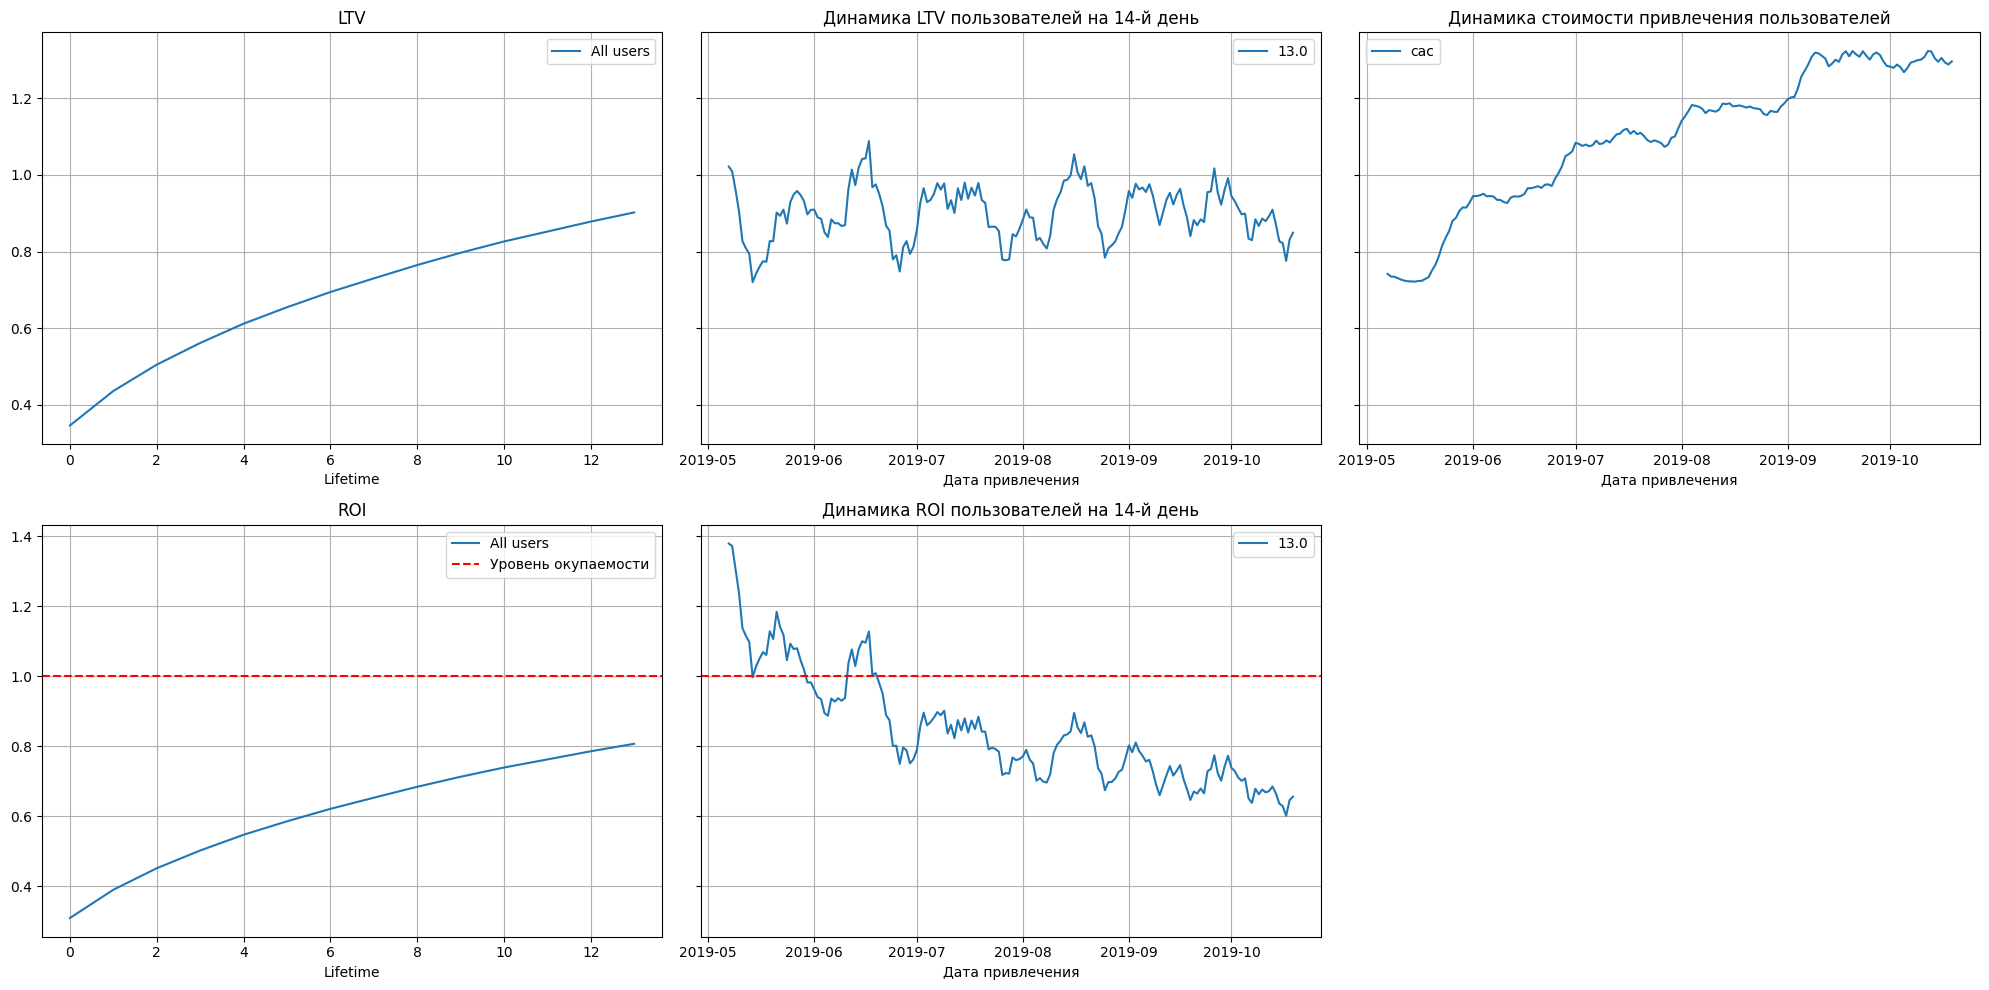

In [ ]:
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

*   Реклама не окупилась. ROI на 13-ый день — 80%.
*   САС растет, пик наблюдается в сентябре-октябре.
*   Динамика ROI пользователей на 14-ый день падает, в июне инвестиции перестали окупаться.
*   LTV колеблется на высоком уровне - от 80 до 100%



Посмотрю динамику окупаемости с разбивкой по устройствам.

<ipython-input-36-69f85c895fa3>:103: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(2, 3, 1)


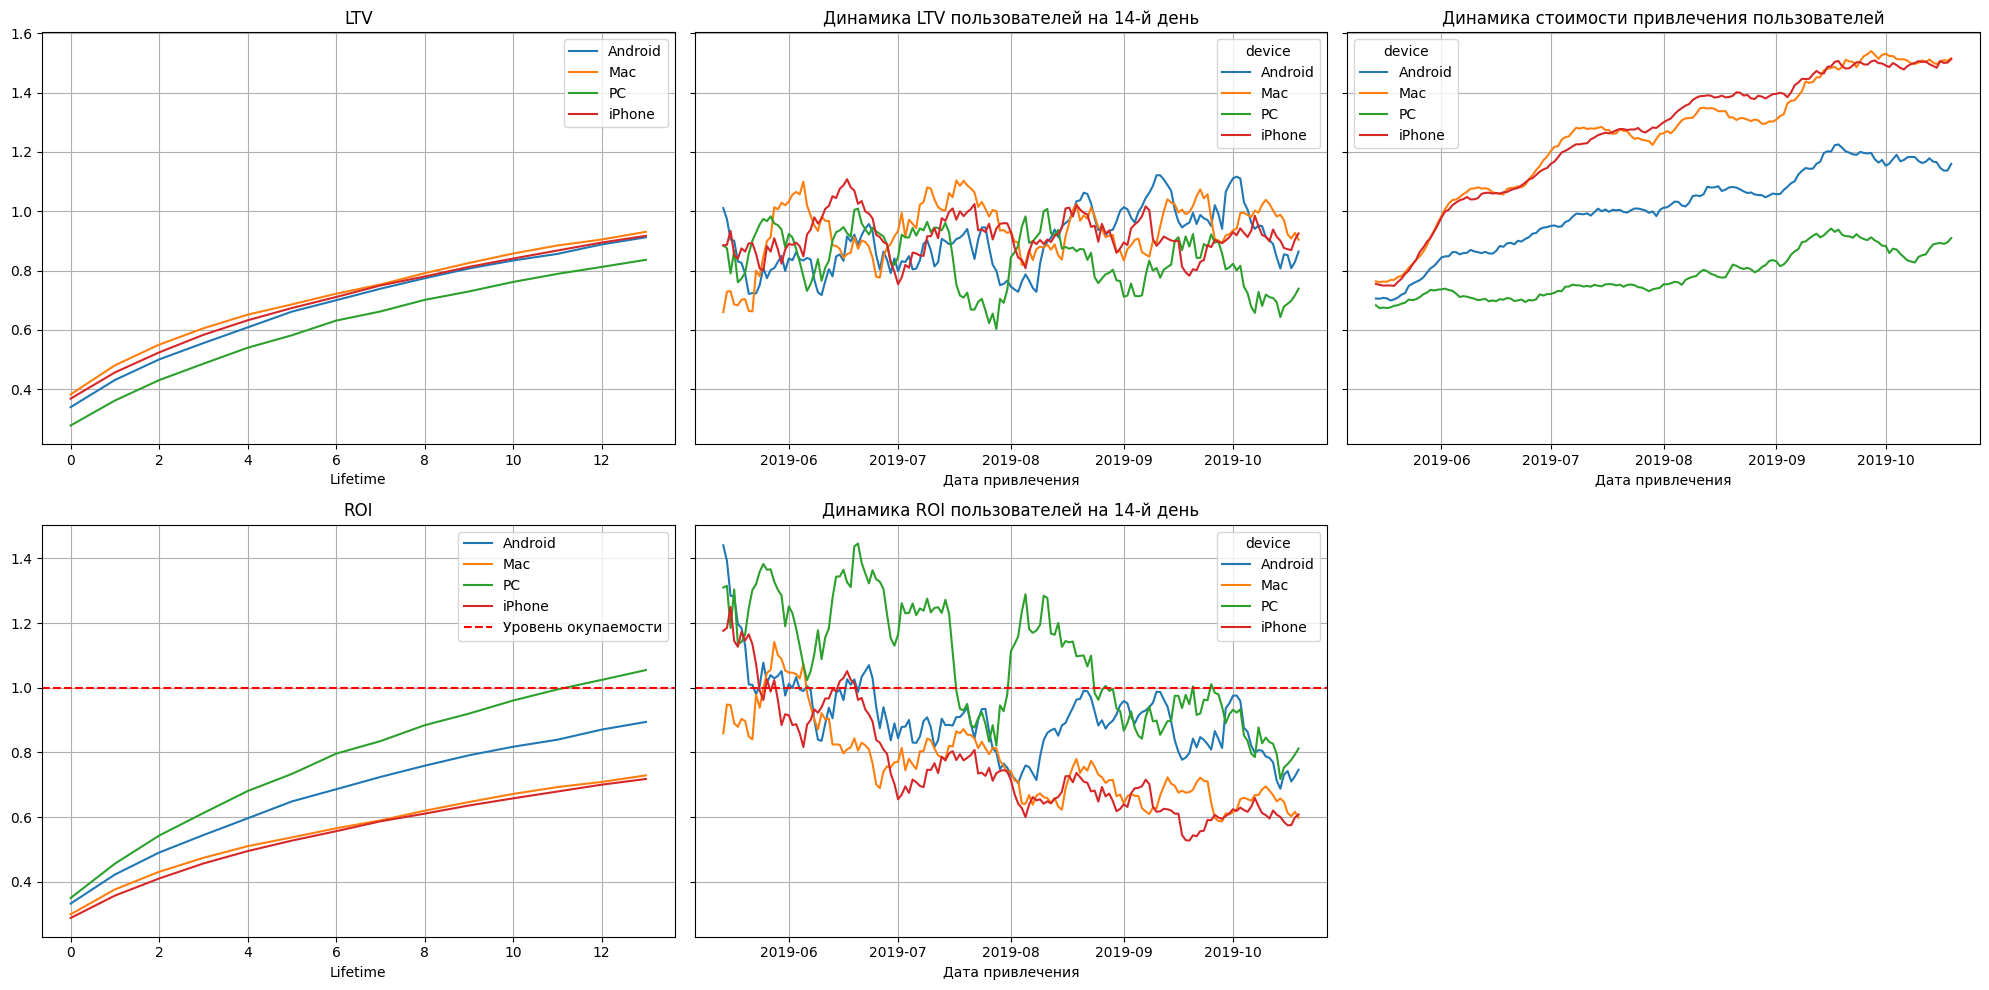

In [ ]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

*   В разрезе окупаемости рекламы с разбивкой по устройствам, компания с конца августа получает только убытки.
*   LTV всех устройств находится примерно на одинаковом уровне, даже в динамике на 14-й день.
*   Пользователи техники Apple(iPhone и Mac)  обходятся компании дороже остальных. Самыми дешевыми по привлечению пользователи являются обладатели РС.
*   Показатель ROI находится выше окупаемости только у пользователей РС. Однако и они с конца августа перестали окупаться на 14-й день.




Посмотрю динамику окупаемости с разбивкой по странам.

<ipython-input-36-69f85c895fa3>:103: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(2, 3, 1)


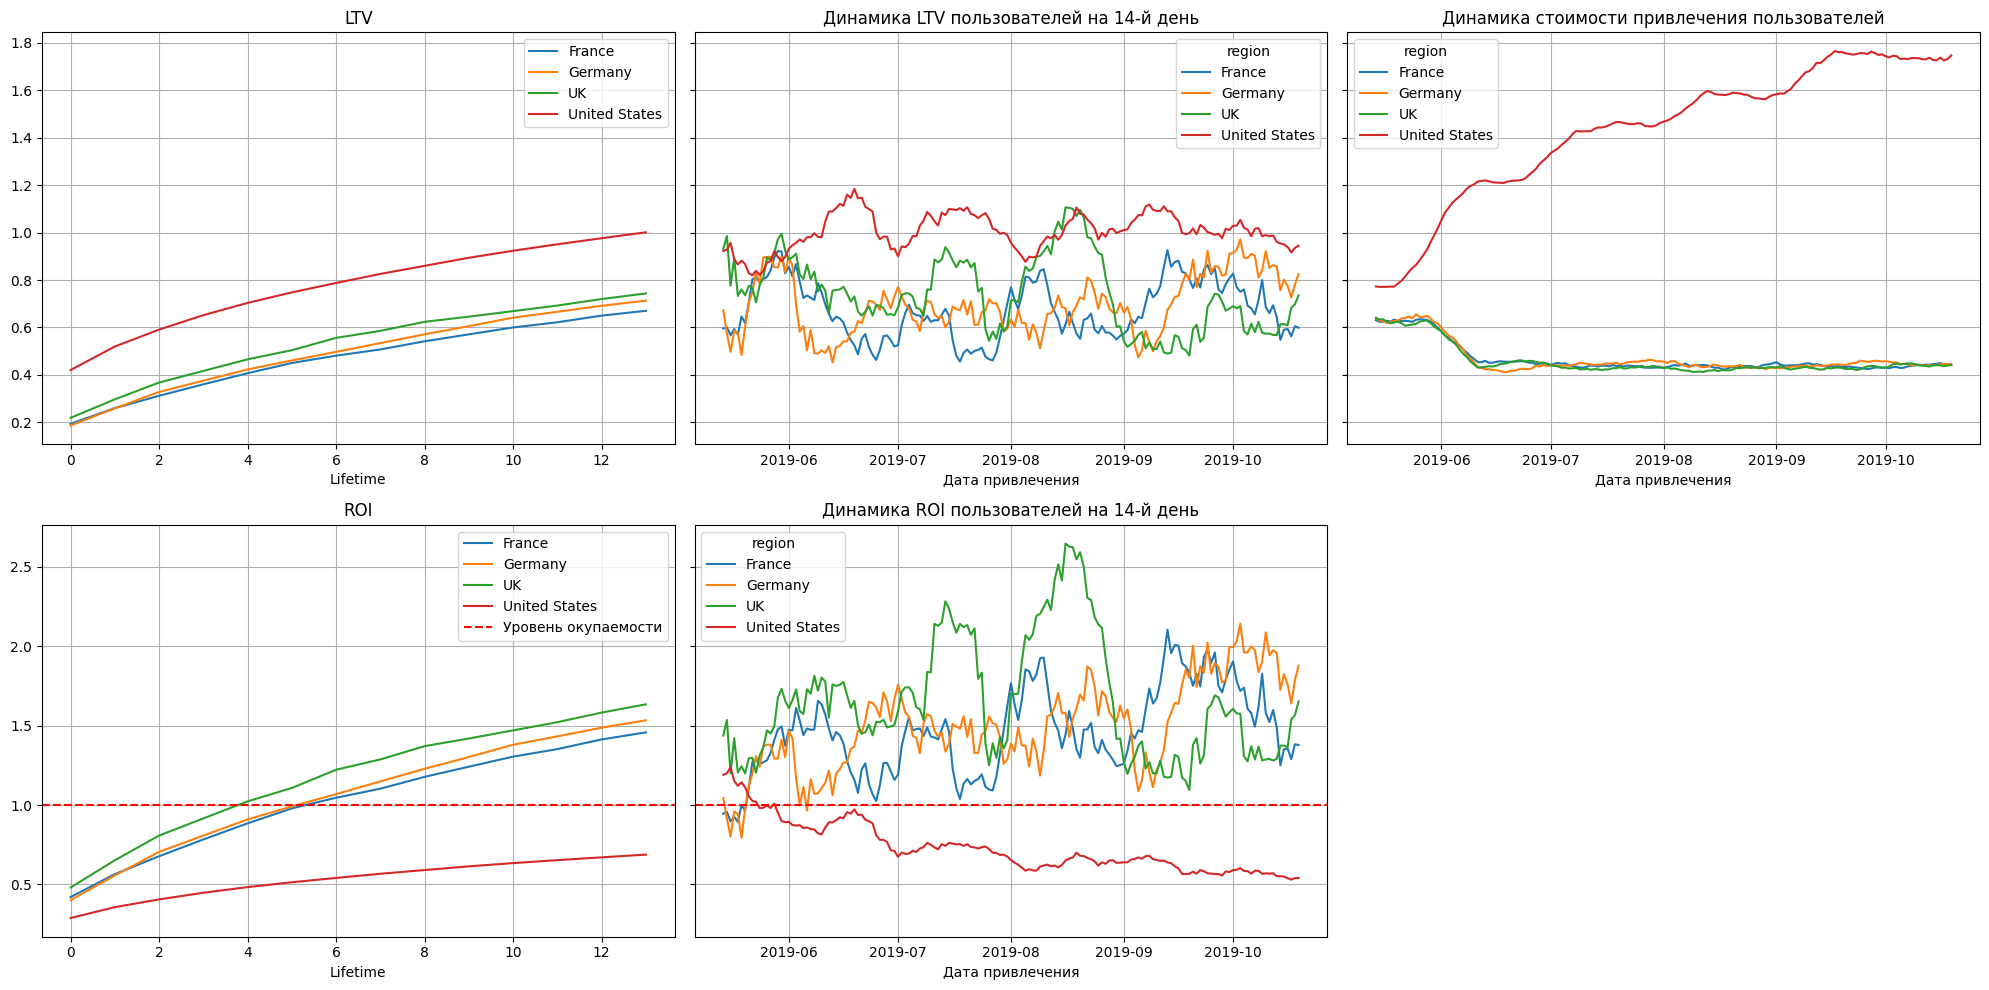

In [ ]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Стоит обратить внимание на пользователей из США:
1.   Имеют большую LTV;
2.   На рекламу тратиться в разы больше средств для привлечения клиентов, чем в другие страны,
3.  Но инвестиции на рекламу в США не окупились, есть немного окупаемости на 14-ый день в начале мая.



Посмотрю окупаемость с разбивкой по источникам привлечения (каналам).

<ipython-input-36-69f85c895fa3>:103: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(2, 3, 1)


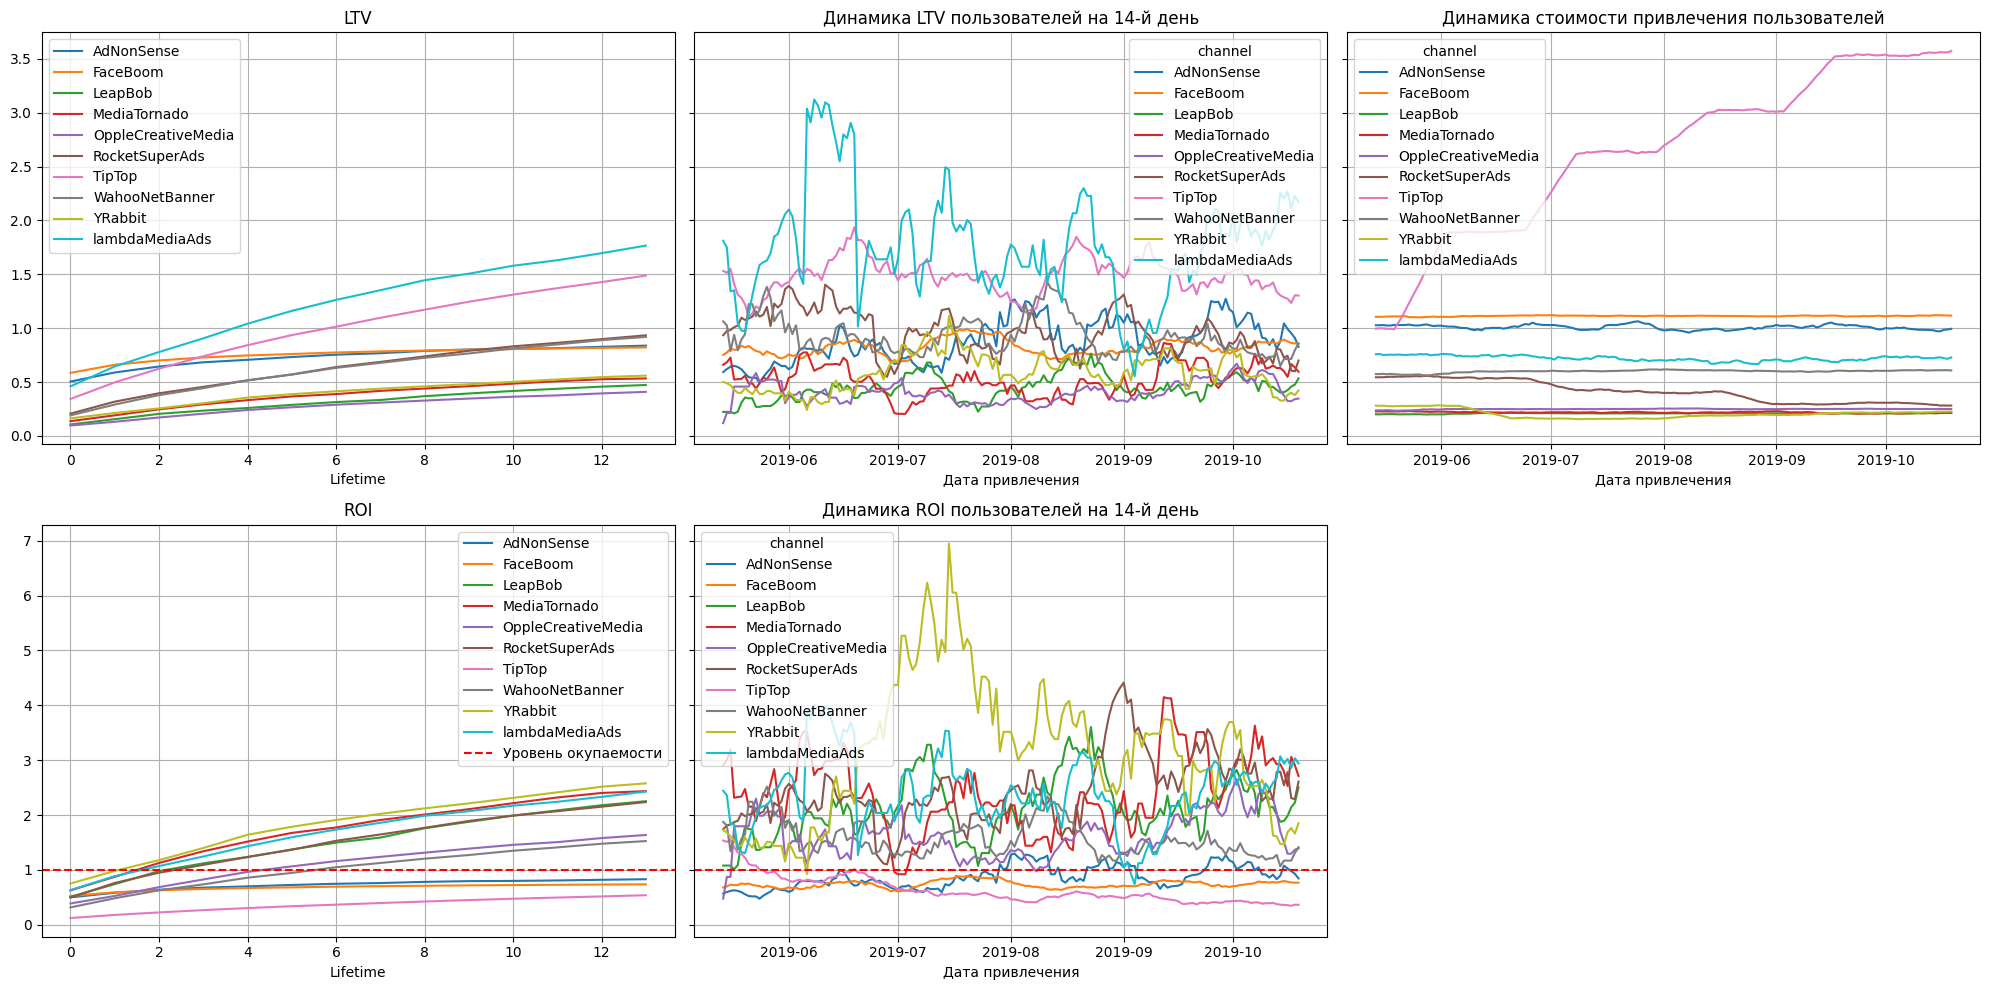

In [ ]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

*   Наилучший показатель LTV показывает канал привлечения lambdaMediaAds
LTV на 14-й день скачущий, нет стабильности, однако наблюдается цикличность и закономерность.
*   Затраты на канал привлечения Tip Top постоянно увеличивается, однако данный канал не превышает уровня окупаемости. Чем больше компания вкладывает в данный канал привлечения - тем больше теряет денег.
*   Интересным для вложения можно считать канал привлечения YRabbit, данный канал окупается и сильно превосходит остальные
*   Лучшие каналы по окупаемости - YRabbit, MediaTornado, lambdaMediaAds
*   Каналы, которые не окупаются - TipTop, FaceBoom, AddNonSense

Посмотрю конверсию по каналам

<ipython-input-36-69f85c895fa3>:67: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(2, 2, 1)


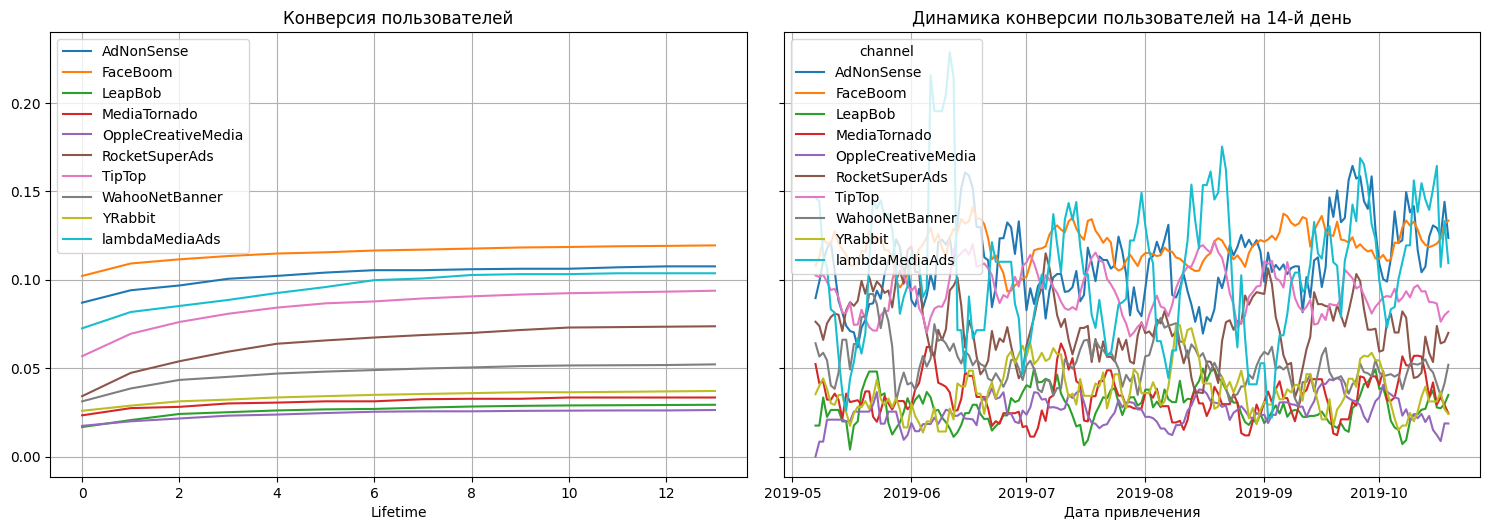

In [ ]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days,dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

<ipython-input-36-69f85c895fa3>:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(2, 2, 1)


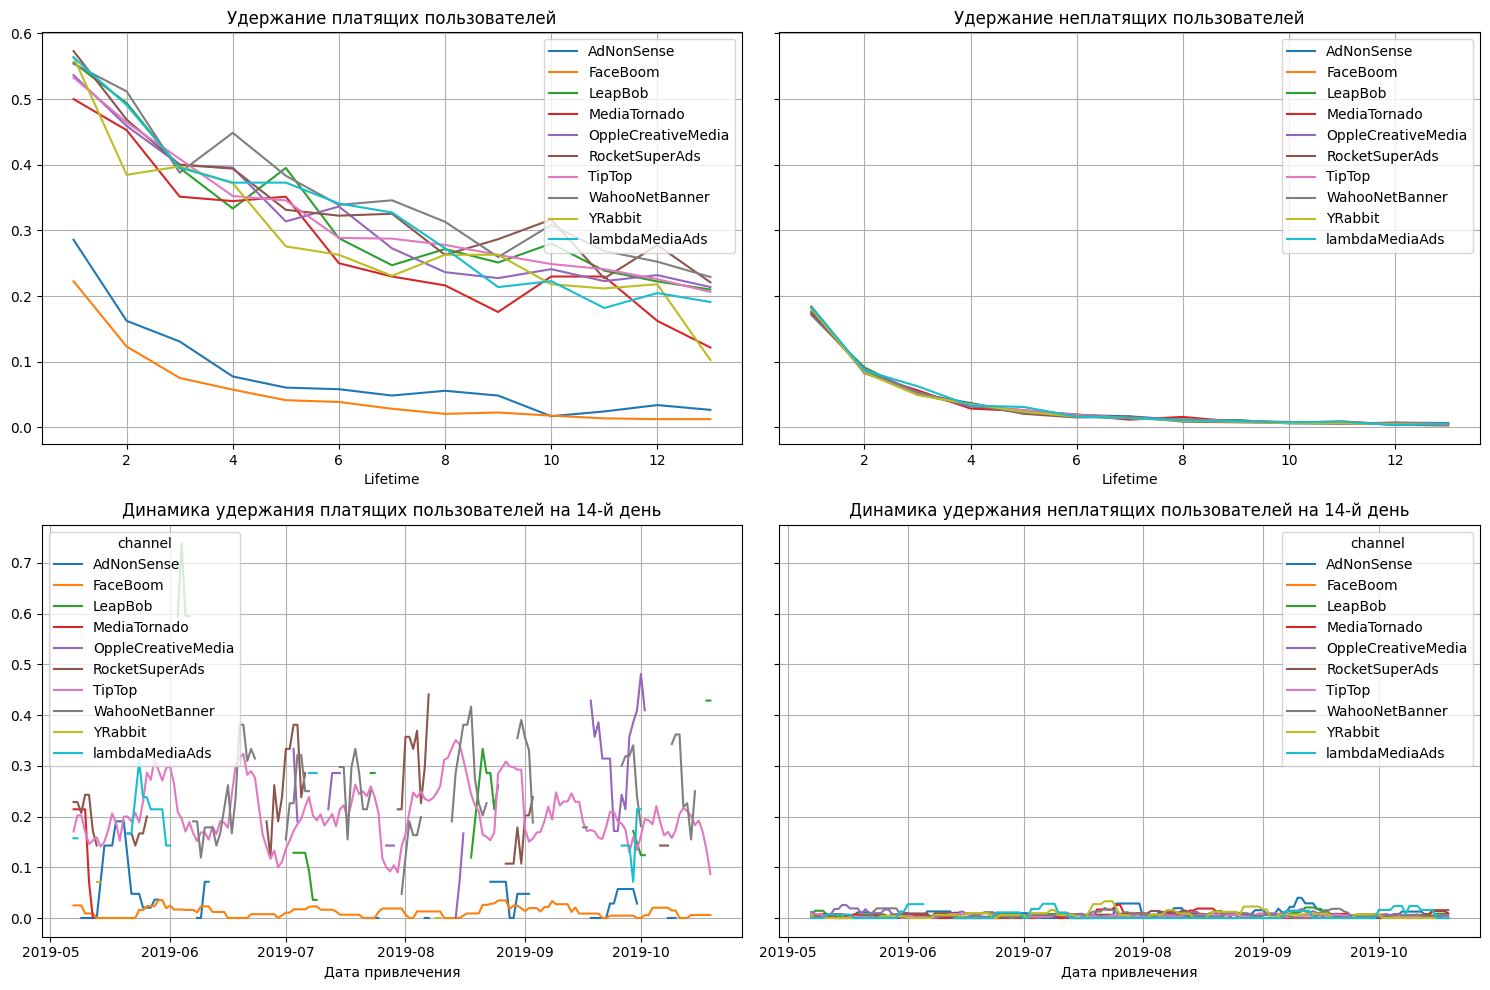

In [ ]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days,dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Faceboom показывает лучший результат по конверсии, AdNonSense и lambdaMediaAds на 8-ой день показывают почти одинаковый результат, они занимают вторую и третью строчку уровня конверсии соответственно.
<br> Худший результат показали такие источники как: YRabbit, MediaTornado, LeapBob и OpplecreativeMedia.

<br>По лидерам графика конверсий видна иная ситуация в графике удержания, клиенты привлеченные через эти источники наименее лояльны к продукту компании. На графике удержания платящих пользователей мы видим, что Faceboom и AdNonSense являются очень не эффективными источниками.

Рассмотрим конверсию и удержание с разбивкой по устройствам пользователей.

<ipython-input-36-69f85c895fa3>:67: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(2, 2, 1)


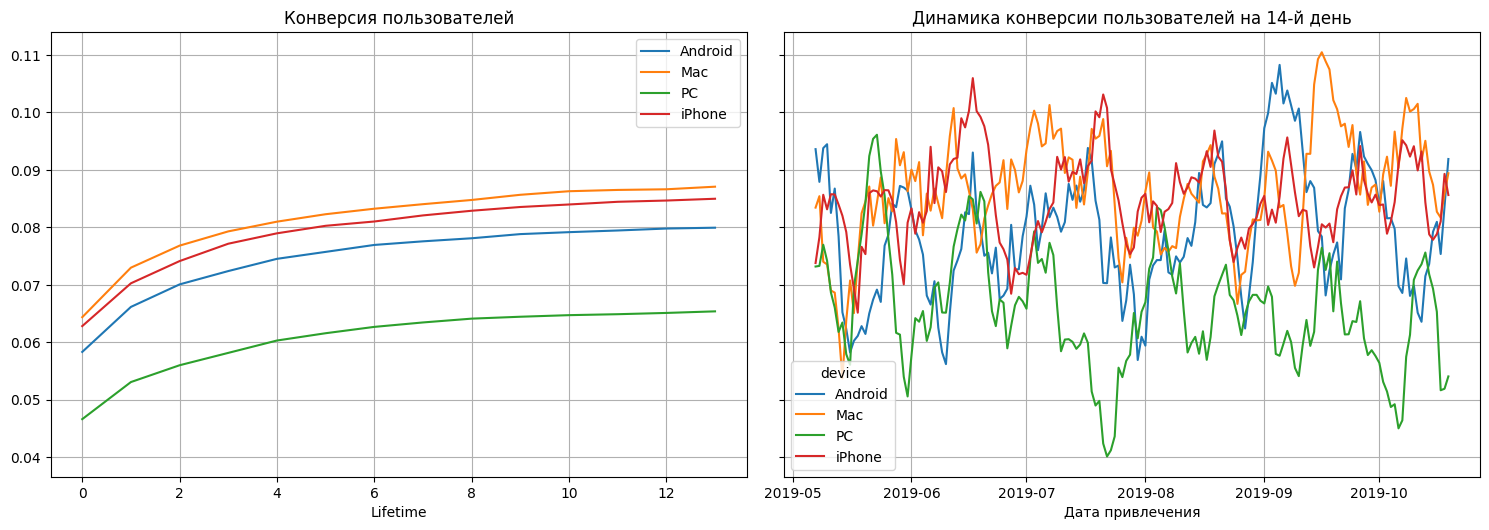

In [ ]:
dimensions = ['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

<ipython-input-36-69f85c895fa3>:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(2, 2, 1)


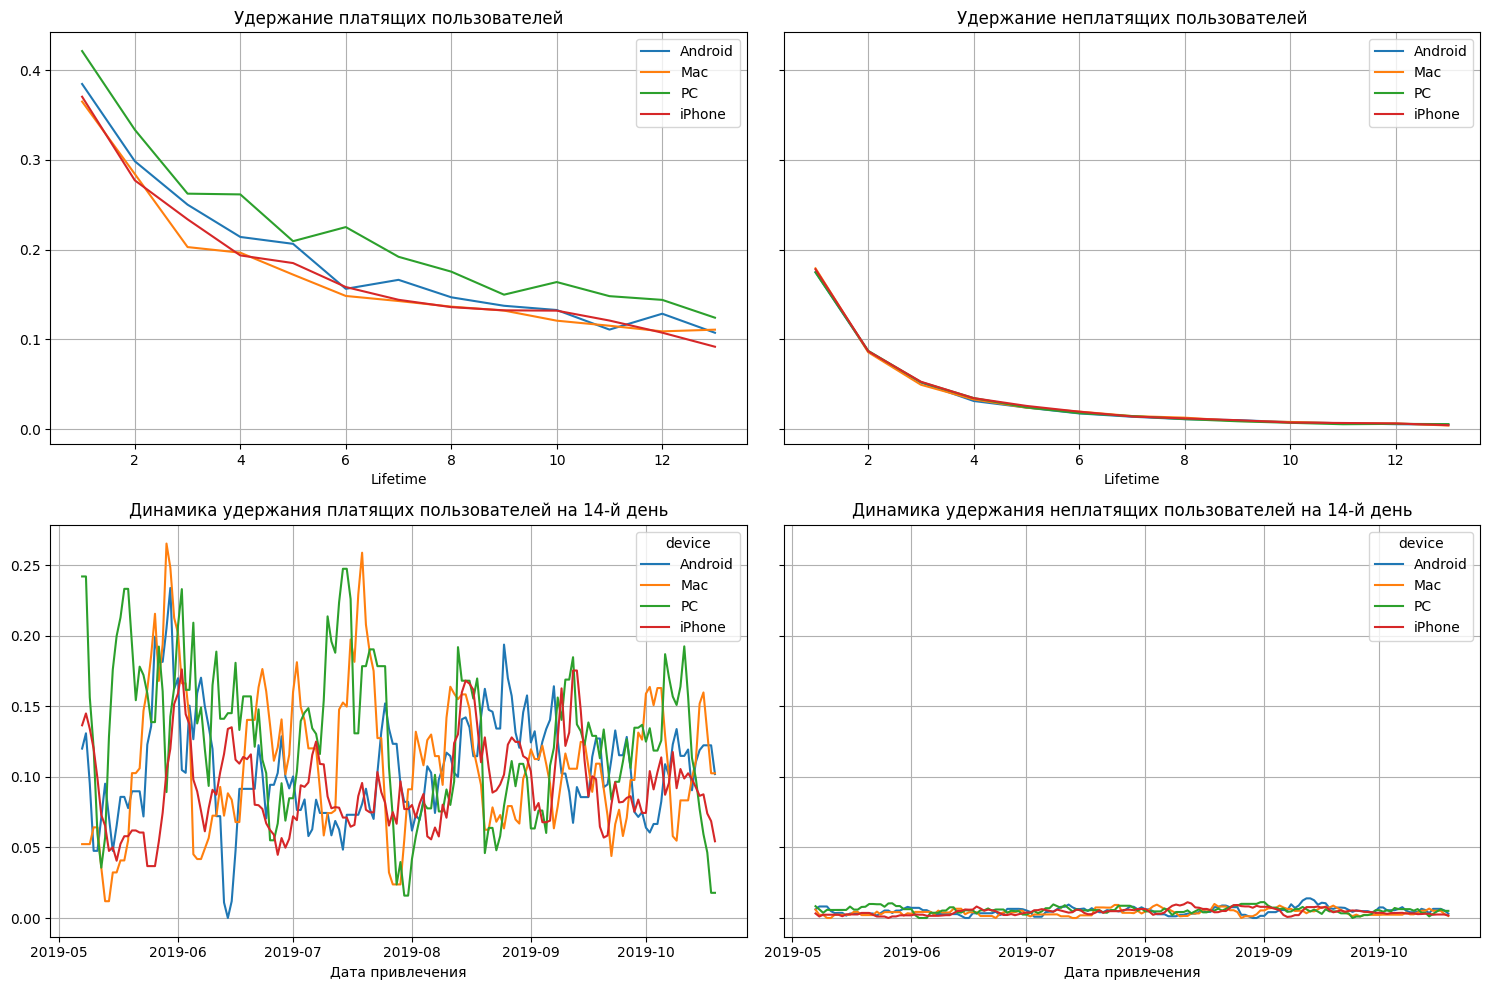

In [ ]:

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days,dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

*   Уровень удержания не платящих пользователей практически одинаково низкий для всех устройств.
*   Среди пользователей РС наблюдается самая низкая конверсия, однако они проявляют наибольшую лояльность к продукту, что отражено на графике удержания.
*   Возможно, в середине июля и в начале октября были неудачные рекламные кампании, которые сказались на низкой конверсии среди пользователей РС.




Рассмотрим графики конверсии и удержания пользователей по странам.

<ipython-input-36-69f85c895fa3>:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(2, 2, 1)


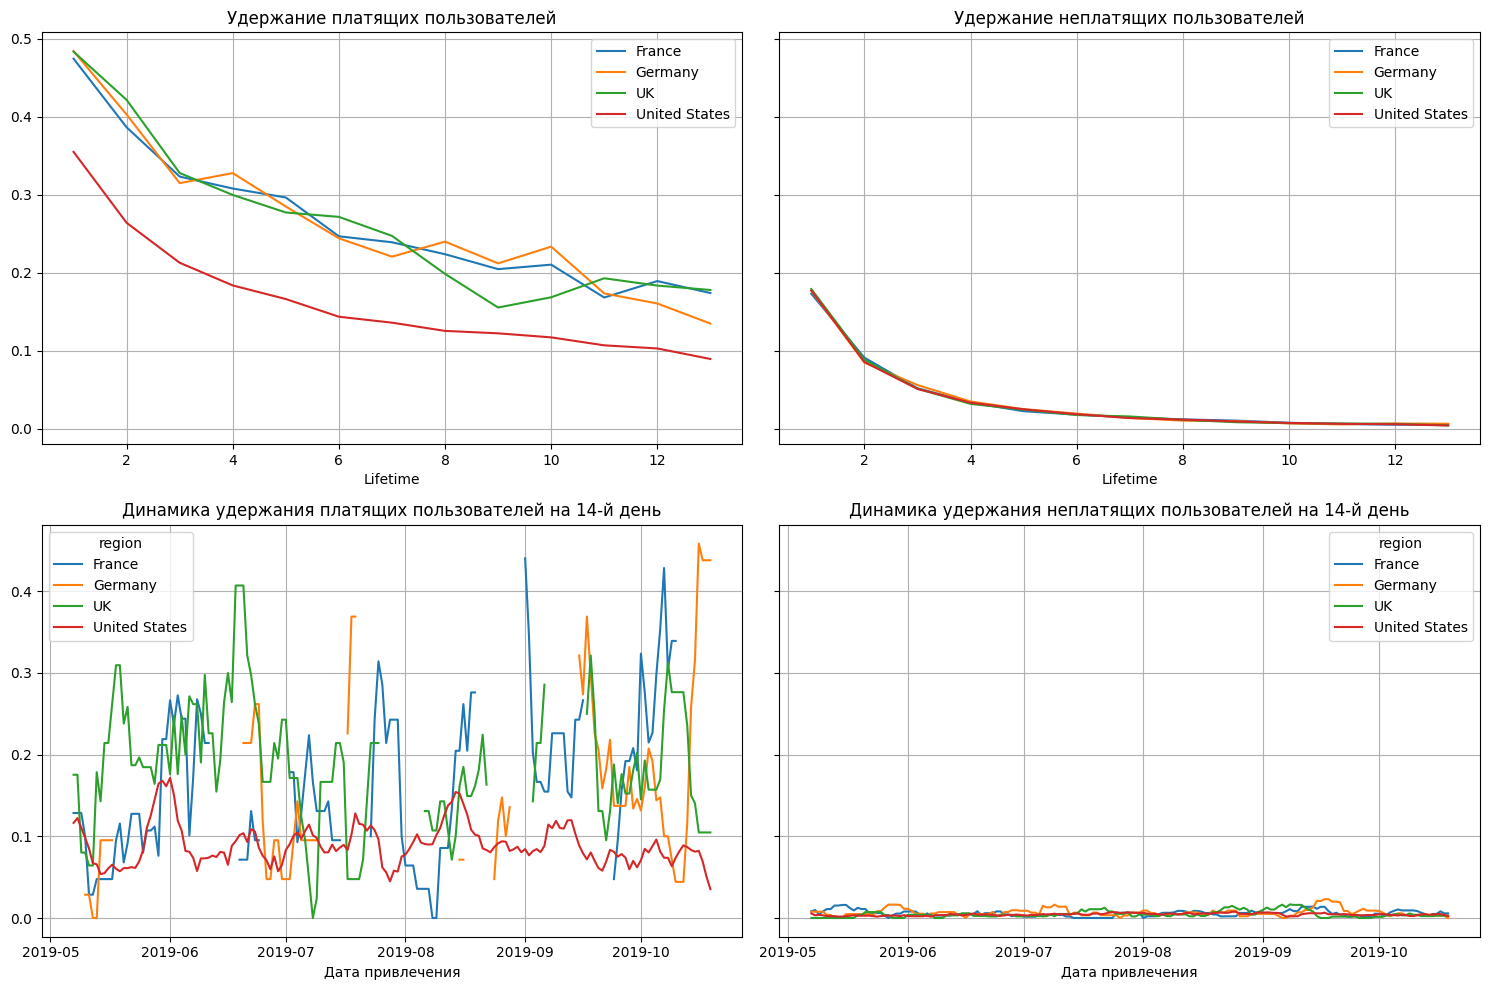

In [ ]:
dimensions = ['region']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

А также посмотрим график конверсии и подытожим результат.

<ipython-input-36-69f85c895fa3>:67: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(2, 2, 1)


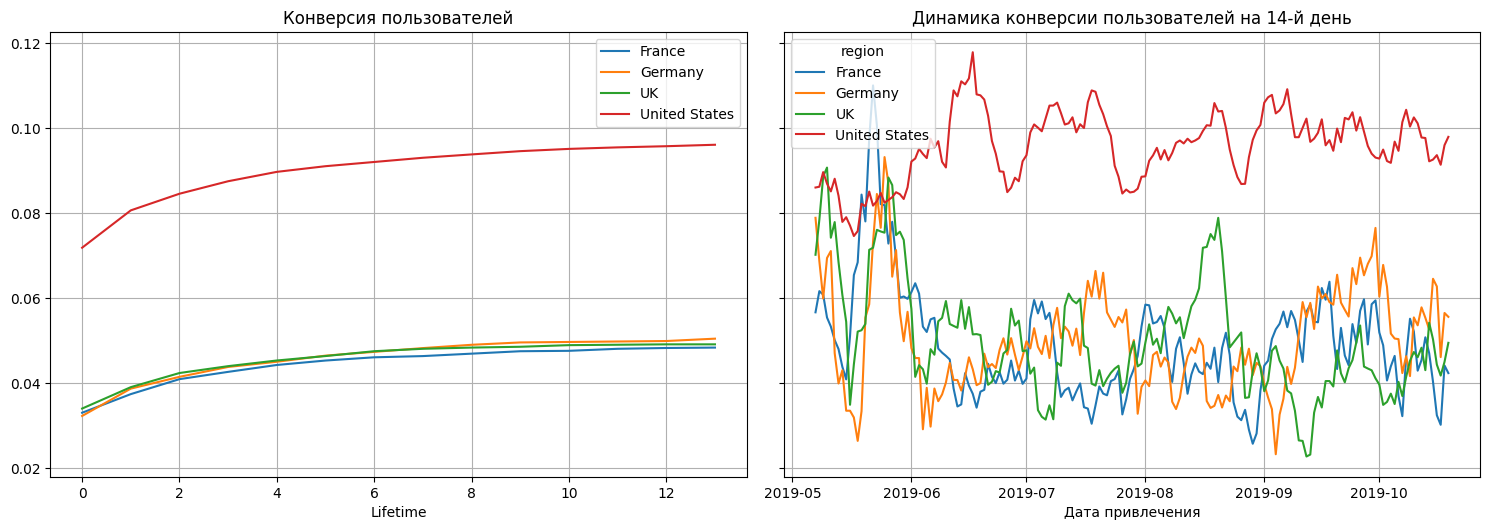

In [ ]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Удержание пользователей из США гораздо ниже остальных, однако конверсия пользователей из США в 2 раза выше чем у пользователей из других стран. Можно ответить на вопросы:
   *   Окупается ли реклама, направленная на привлечение пользователей в целом?
      *   В целом реклама не окупилась, реклама окупилась среди пользователей ПК, в Европейских странах и Великобритании, окупились также пользователи пришедших из всех источников за исключением: FaceBoom, AdNonSense и TipTop.
   *   Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
      *   Негативное влияние на окупаемость рекламы влияют клиенты из США, пользующиеся девайсами Apple.
   *   Чем могут быть вызваны проблемы окупаемости?
      *   Проблемы с окупаемостью возникли из-за неправильного распределения средств между каналами привлечения, причем TipTop, наиболее невыгодный канал для привлечения, привлекает большинство пользователей из США. Также стоит уделить внимание каналам, с которых привлекаются платящие пользователи на ПК, так как они демонстрируют наилучшую удержание.

### Итоговые выводы:
Три канала инвестиций, которые не окупились: AdNonSense, FaceBoom, TipTop. Основными аудиториями этих каналов являются жители США. При этом удержание платящих пользователей из США оказалось самым низким. Анализ динамики ROI по странам показал, что с каждым месяцем привлеченные платящие пользователи из США все хуже окупались, в то время как расходы на их привлечение только росли.

Возможные причины, связанные с проблемой рекламы в США:

1. В июне произошло событие среди пользователей США (возможно обновление приложения для США), оказавшее существенное влияние на поведение пользователей.
2. Пользователи устройств Apple оказались самыми неплатежеспособными. Возможно, существует проблема с оптимизацией приложения Procrastinate Pro+ для устройств операционных систем Apple.
3. Рекламная система TipTop оказалась неэффективной, и вложения в этот канал были недооценены.

Также был отмечен необоснованно высокий показатель CAC в канале TipTop.

Конверсия пользователей FaceBoom была высокой, однако удержание платящих пользователей было низким. Этот канал показал хорошие результаты по привлечению, но низкое качество платного контента могло стать причиной оттока пользователей. Следует оценить этот канал более детально перед его исключением из планов.

Рекомендации для отдела маркетинга:

1. Пересмотреть финансовые затраты на рекламу для пользователей из США, поискать новые источники привлечения пользователей в США.
2. Увеличить усилия по привлечению пользователей с ПК и устройств на платформе Android.
3. Обратить внимание на два недооцененных канала с высоким ROI, конверсией и удержанием: RocketSuperAds и RocketSuperAds.
4. Платящие пользователи с ПК демонстрируют хорошее удержание, но низкую конверсию. Следует улучшить рекламные материалы.
5. Канал lambdaMediaAds имеет самый высокий показатель LTV. Следует искать более экономичные способы привлечения пользователей для этого канала с целью увеличения ROI.
